In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns

In [2]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.rcParams['axes.grid']=True

In [3]:
ts_data = pd.read_excel("pma.xlsx")
ts_data = ts_data.reset_index().drop("index", axis=1)
ts_data["time"] = pd.to_datetime(ts_data["time"])
ts_data = ts_data.set_index("time")
ts_data.head()

,pma,tmp
time,,
2016-01-01 00:00:00,1042.909320,6.933756
2016-01-01 01:00:00,982.529002,6.405644
2016-01-01 02:00:00,983.240592,5.932445
2016-01-01 03:00:00,1002.780354,5.503807
2016-01-01 04:00:00,1011.657004,5.112056


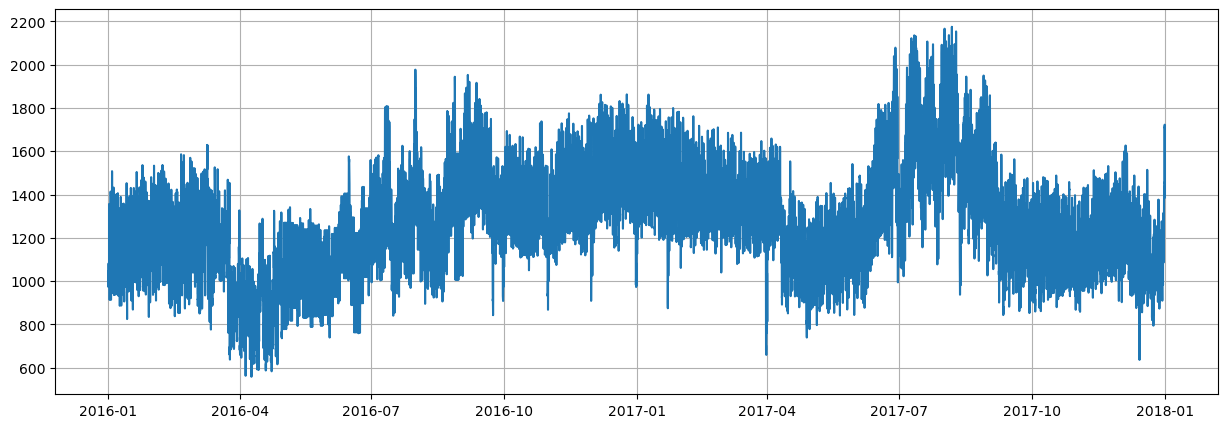

In [4]:
plt.plot(ts_data.index, ts_data["pma"])

In [5]:
ts_data = pd.read_excel("pma.xlsx")
ts_data = ts_data.reset_index().drop("index", axis=1)
ts_data["time"] = pd.to_datetime(ts_data["time"])
ts_data = ts_data.set_index("time")
ts_data.head()

,pma,tmp,date,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,is_special_day,season
time,,,,,,,,,,,,
2016-01-01 00:00:00,1042.909320,6.933756,2016-01-01,0,4,1,1,2016,1,1,0,1
2016-01-01 01:00:00,982.529002,6.405644,2016-01-01,1,4,1,1,2016,1,1,0,1
2016-01-01 02:00:00,983.240592,5.932445,2016-01-01,2,4,1,1,2016,1,1,0,1
2016-01-01 03:00:00,1002.780354,5.503807,2016-01-01,3,4,1,1,2016,1,1,0,1
2016-01-01 04:00:00,1011.657004,5.112056,2016-01-01,4,4,1,1,2016,1,1,0,1


In [144]:
seasons = [1, 2, 3, 4]

def map_season(month, day):
    if (month == 12 and day >= 21) or (month == 1) or (month == 2) or (month == 3 and day < 21):
        return seasons[0]  # Winter
    elif (month == 3 and day >= 21) or (month == 4) or (month == 5) or (month == 6 and day < 21):
        return seasons[1]  # Spring
    elif (month == 6 and day >= 21) or (month == 7) or (month == 8) or (month == 9 and day < 21):
        return seasons[2]  # Summer
    else:
        return seasons[3]  # Fall


def is_special_day(date):
    special_days = ['2016-07-06', '2017-06-25', '2016-09-12', '2017-09-01']
    special_days = pd.to_datetime(special_days).date

    return int(date in special_days)


def create_features(df):
    """
    Create time series features based on the time series index.
    """
    df = df.copy()
    df["date"] = df.index.date
    df['hour'] = df.index.hour
    df['dayofweek'] = ((df.index.dayofweek + 8) % 7) + 1
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df["is_special_day"] = df.apply(lambda row: is_special_day(row.date), axis=1)
    df['season'] = df.apply(lambda row: map_season(row.month, row.dayofmonth), axis=1)
    df['weekofyear'] = df.index.isocalendar().week

    df.drop(columns=["date"], inplace=True)
    return df

df = create_features(ts_data)

df

,pma,tmp,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,is_special_day,season,weekofyear
time,,,,,,,,,,,,
2016-01-01 00:00:00,1042.909320,6.933756,0,6,1,1,2016,1,1,0,1,53
2016-01-01 01:00:00,982.529002,6.405644,1,6,1,1,2016,1,1,0,1,53
2016-01-01 02:00:00,983.240592,5.932445,2,6,1,1,2016,1,1,0,1,53
2016-01-01 03:00:00,1002.780354,5.503807,3,6,1,1,2016,1,1,0,1,53
2016-01-01 04:00:00,1011.657004,5.112056,4,6,1,1,2016,1,1,0,1,53
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31 19:00:00,1709.119118,13.065041,19,1,4,12,2017,365,31,0,1,52
2017-12-31 20:00:00,1722.716647,11.938791,20,1,4,12,2017,365,31,0,1,52
2017-12-31 21:00:00,1638.983132,11.057673,21,1,4,12,2017,365,31,0,1,52


<Axes: xlabel='hour', ylabel='pma'>

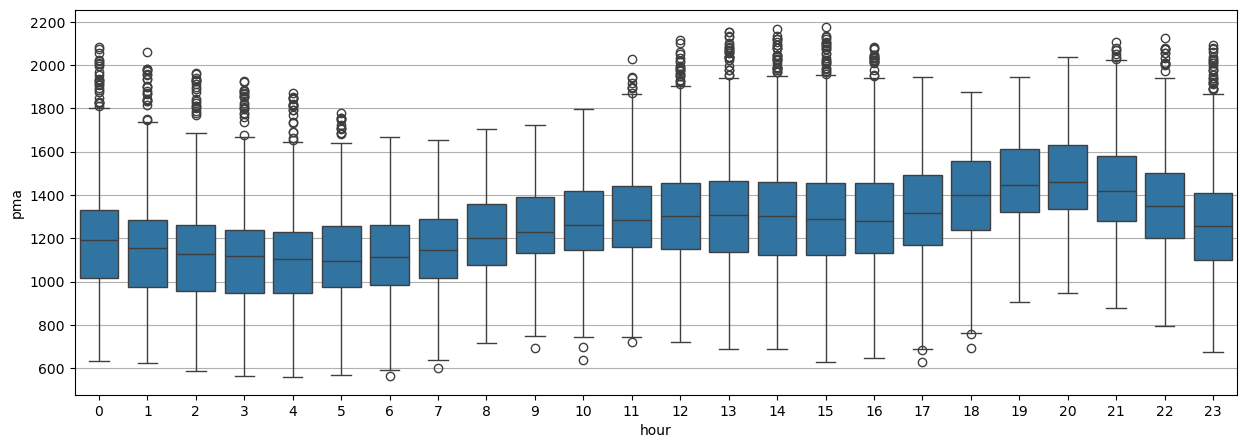

In [6]:
sns.boxplot(data=df, x='hour', y='pma')

<Axes: xlabel='month', ylabel='pma'>

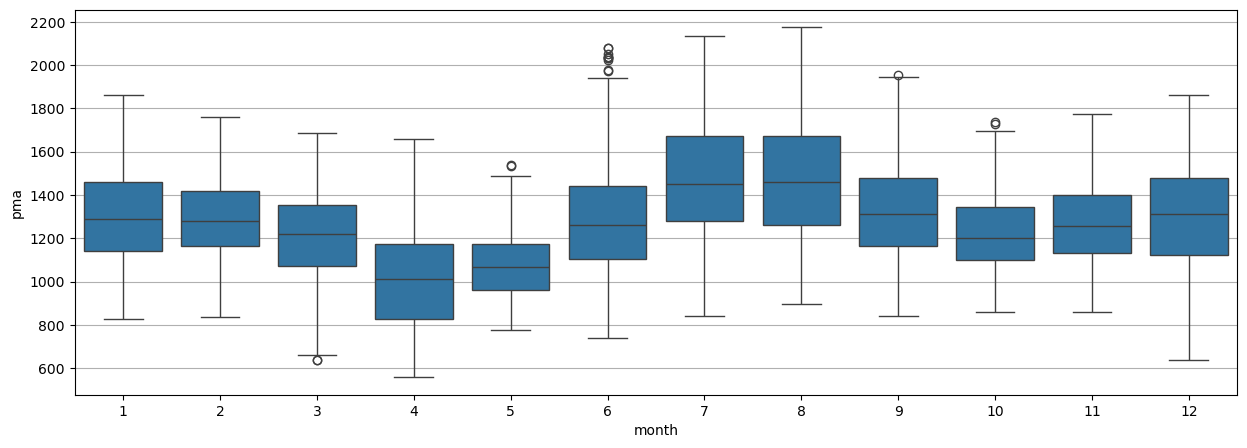

In [7]:
sns.boxplot(data=df, x='month', y='pma')

<Axes: xlabel='season', ylabel='pma'>

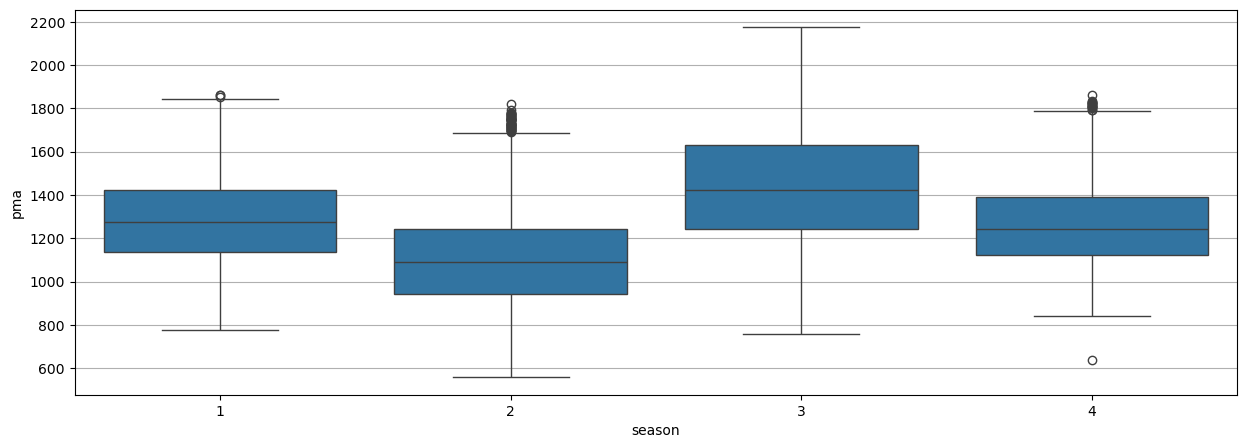

In [8]:
sns.boxplot(data=df, x='season', y='pma')

<Axes: xlabel='is_special_day', ylabel='pma'>

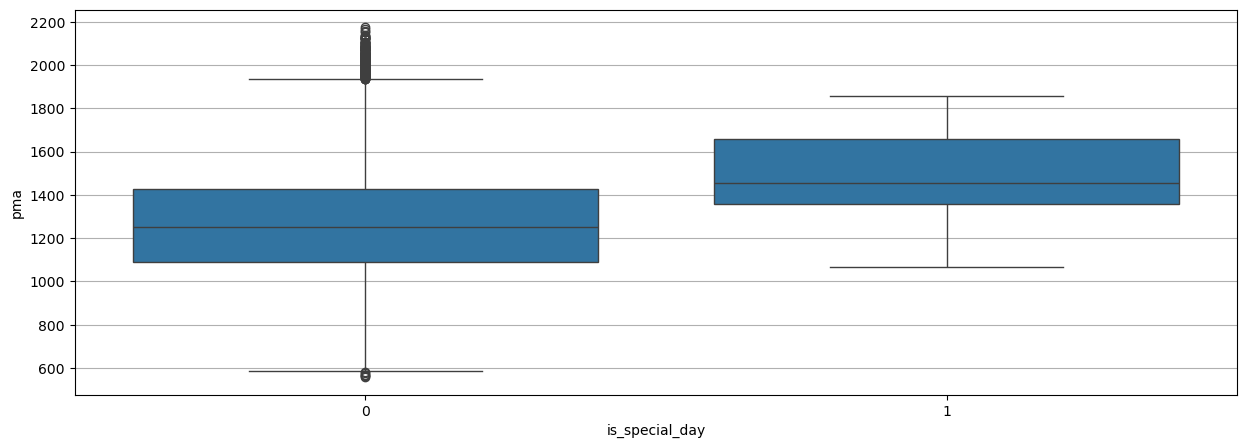

In [9]:
sns.boxplot(data=df, x='is_special_day', y='pma')

# Model creation

In [10]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

FEATURES = ['dayofyear', 'hour', 'dayofweek', 'quarter', 'month', 'year', "season", "is_special_day", "tmp"]
TARGET = 'pma'

split_date = "01-06-2017"
train = df.loc[df.index < split_date]
test = df.loc[df.index >= split_date]

X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',
                       n_estimators=5000,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

[0]	validation_0-rmse:1240.00653	validation_1-rmse:1326.87985
[100]	validation_0-rmse:473.76108	validation_1-rmse:568.92173


/home/froggy/miniforge3/envs/DM_ENV/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [01:22:52] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[200]	validation_0-rmse:210.50253	validation_1-rmse:307.72312
[300]	validation_0-rmse:134.34016	validation_1-rmse:237.85151
[400]	validation_0-rmse:115.39431	validation_1-rmse:229.80874
[464]	validation_0-rmse:110.85695	validation_1-rmse:229.95816


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=5000, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

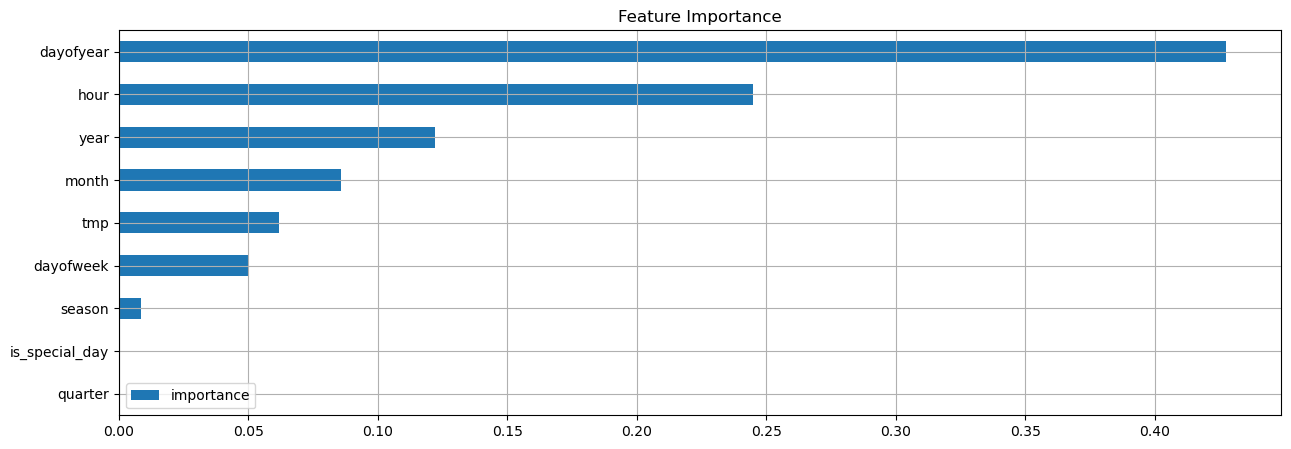

In [11]:
fi = pd.DataFrame(data=reg.feature_importances_,
             index=reg.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

/tmp/ipykernel_144868/1620770108.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['prediction'] = reg.predict(X_test)


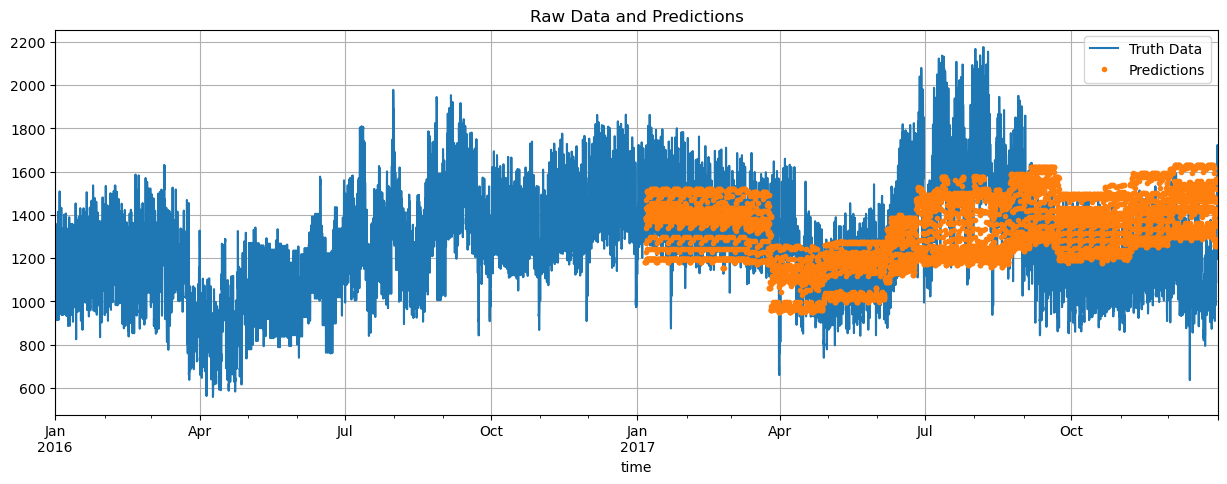

In [12]:
test['prediction'] = reg.predict(X_test)
df = df.merge(test[['prediction']], how='left', left_index=True, right_index=True)
ax = df[['pma']].plot(figsize=(15, 5))
test['prediction'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Data and Predictions')
plt.show()

In [13]:
score = np.sqrt(mean_squared_error(test['pma'], test['prediction']))
print(f'RMSE Score on Test set: {score:0.2f}')

RMSE Score on Test set: 229.61


In [14]:
test['error'] = np.abs(test[TARGET] - test['prediction'])
test['date'] = test.index.date
test.groupby(['date'])['error'].mean().sort_values(ascending=False).head(5)

date
2017-08-01    500.046026
2017-07-12    489.757610
2017-08-02    463.822227
2017-08-09    458.382870
2017-08-06    452.927712
Name: error, dtype: float64

In [141]:
df[:900:24]

,pma,tmp,date,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,is_special_day,season,prediction
time,,,,,,,,,,,,,
2016-01-01,1042.909320,6.933756,2016-01-01,0,4,1,1,2016,1,1,0,1,NaN
2016-01-02,978.905006,6.823037,2016-01-02,0,5,1,1,2016,2,2,0,1,NaN
2016-01-03,963.531295,7.523951,2016-01-03,0,6,1,1,2016,3,3,0,1,NaN
2016-01-04,978.357666,9.940110,2016-01-04,0,0,1,1,2016,4,4,0,1,NaN
2016-01-05,1042.119863,12.301303,2016-01-05,0,1,1,1,2016,5,5,0,1,NaN
2016-01-06,999.353644,10.359893,2016-01-06,0,2,1,1,2016,6,6,0,1,NaN
2016-01-07,1007.034998,7.107522,2016-01-07,0,3,1,1,2016,7,7,0,1,NaN
2016-01-08,954.652053,8.017389,2016-01-08,0,4,1,1,2016,8,8,0,1,NaN
2016-01-09,979.108484,10.514004,2016-01-09,0,5,1,1,2016,9,9,0,1,NaN


## Group by day type

In [128]:
ts_bydate = df.groupby("date").agg({"pma": "median", "tmp": "mean", "year": "min", "month": "min", "dayofmonth": "min", "dayofyear": "min", "is_special_day": "min", "season": "min", "dayofweek": "min", "quarter": "min"})

ts_bydate.index = pd.to_datetime(ts_bydate.index)

ts_bydate.head()

,pma,tmp,year,month,dayofmonth,dayofyear,is_special_day,season,dayofweek,quarter
date,,,,,,,,,,
2016-01-01,1016.879030,10.632358,2016,1,1,1,0,1,4,1
2016-01-02,1132.572358,11.210259,2016,1,2,2,0,1,5,1
2016-01-03,1179.197928,11.308115,2016,1,3,3,0,1,6,1
2016-01-04,1157.773987,14.102192,2016,1,4,4,0,1,0,1
2016-01-05,1147.839757,14.428482,2016,1,5,5,0,1,1,1


In [18]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score

pca = PCA(n_components=0.99)
standard_scaler = StandardScaler()

daily_transformed = pca.fit_transform(ts_bydate)
daily_transformed = standard_scaler.fit_transform(daily_transformed)

daily_transformed

array([[-0.97335359, -1.55228286],
       [-0.71608572, -1.60060272],
       [-0.55335891, -1.62759895],
       ...,
       [-0.86279381,  1.9412235 ],
       [-0.86375398,  1.95133656],
       [ 0.76122277,  1.59371311]])

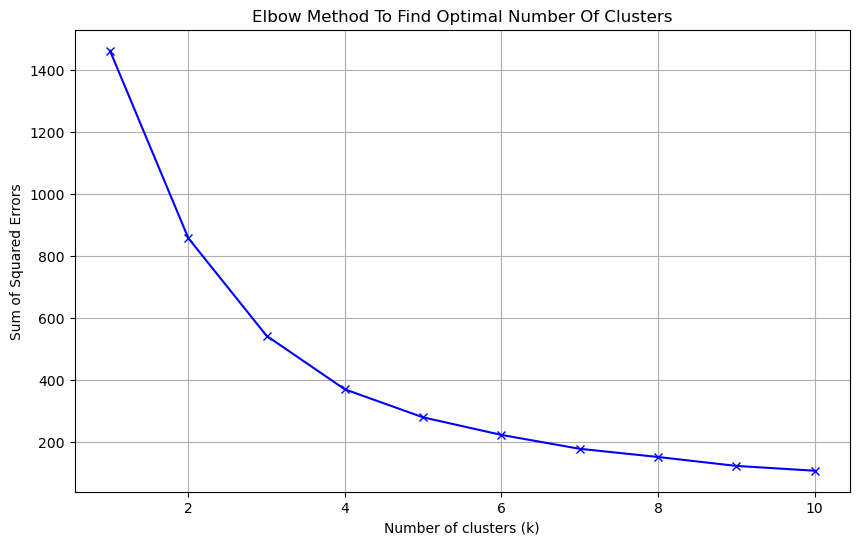

In [19]:
sse = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(daily_transformed)
    sse.append(kmeans.inertia_) # inertia is SSE    

plt.figure(figsize=[10, 6])
plt.plot(k_values, sse, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Errors')
plt.title('Elbow Method To Find Optimal Number Of Clusters')
plt.show()

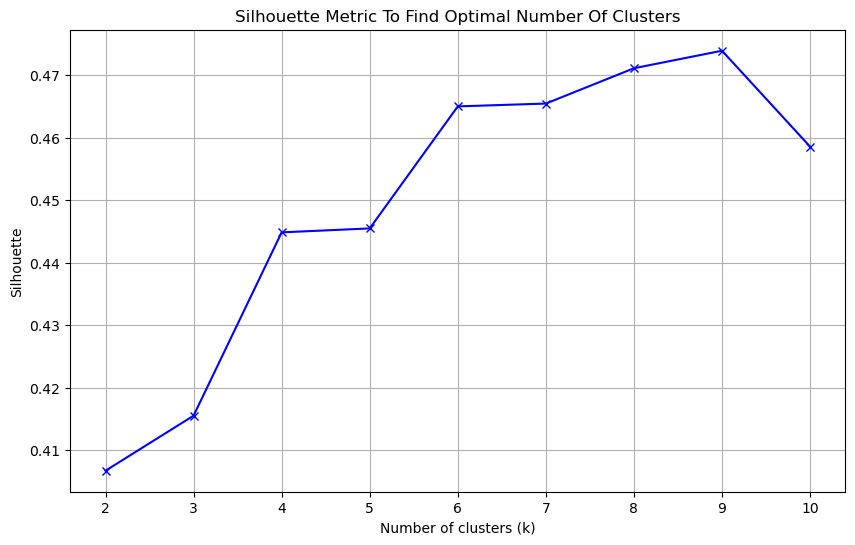

In [20]:
silhouette = []
k_value = range(2, 11) # silhouette needs at least 2 clusters

for k in k_value:
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(daily_transformed)
    cluster_labels = kmeans.labels_
    silhouette.append(silhouette_score(daily_transformed, cluster_labels))

plt.figure(figsize=[10, 6])
plt.plot(k_value, silhouette, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette')
plt.title('Silhouette Metric To Find Optimal Number Of Clusters')
plt.show()

In [21]:
# getting te number of clusters corresponding to the highest silouhete score


In [22]:

train = ts_bydate.loc[ts_bydate["dayofyear"] % 4 != 0]
test = ts_bydate.loc[ts_bydate["dayofyear"] % 4 == 0]

train.head()

,pma,tmp,year,month,dayofmonth,dayofyear,is_special_day,season,dayofweek,quarter
date,,,,,,,,,,
2016-01-01,1081.889890,10.632358,2016,1,1,1,0,1,4,1
2016-01-02,1136.958111,11.210259,2016,1,2,2,0,1,5,1
2016-01-03,1171.752876,11.308115,2016,1,3,3,0,1,6,1
2016-01-05,1133.930420,14.428482,2016,1,5,5,0,1,1,1
2016-01-06,1176.397505,9.983845,2016,1,6,6,0,1,2,1


In [61]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score

pca = PCA(n_components=0.95)
standard_scaler = StandardScaler()

train_transformed = pca.fit_transform(train)
train_transformed = standard_scaler.fit_transform(train_transformed)

train_transformed

array([[-0.96689431, -1.55070007],
       [-0.70911032, -1.59836631],
       [-0.54605974, -1.62495721],
       ...,
       [-1.06399112,  1.97229085],
       [-0.85797727,  1.93633209],
       [ 0.76932695,  1.59303825]])

In [24]:
k = 5
kmeans = KMeans(n_clusters=k, n_init=10)
cluster = kmeans.fit(ts_bydate)
cluster_labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

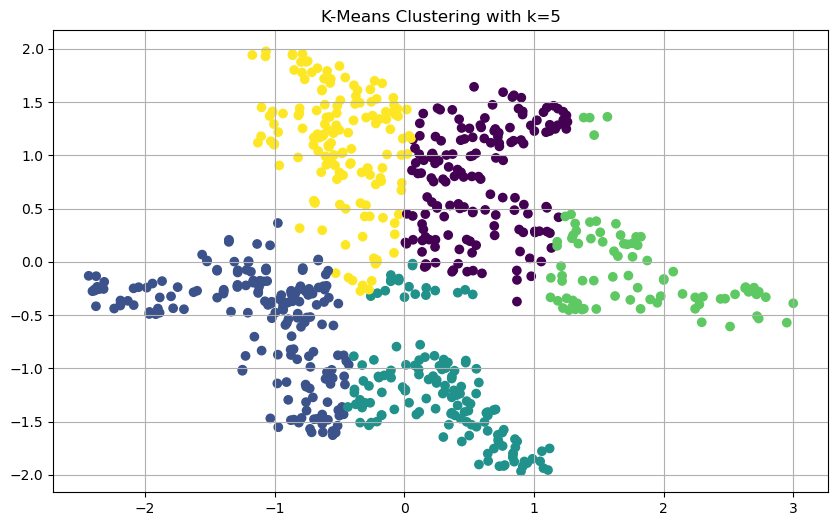

In [25]:
# plotting the clustering results
plt.figure(figsize=[10, 6])
plt.scatter(daily_transformed[:, 0], daily_transformed[:, 1], c=cluster_labels)
plt.title(f'K-Means Clustering with k={k}')
plt.show()

In [26]:
reduced_test = pca.fit_transform(test)
normalised_reduced_test = standard_scaler.fit_transform(reduced_test)

prediction = cluster.predict(test)

In [27]:
colors = [list(np.random.choice(range(255),size=3)) for x in range(cluster.n_clusters)]
colors


[[222, 198, 58], [232, 83, 129], [3, 246, 229], [140, 91, 103], [148, 29, 58]]

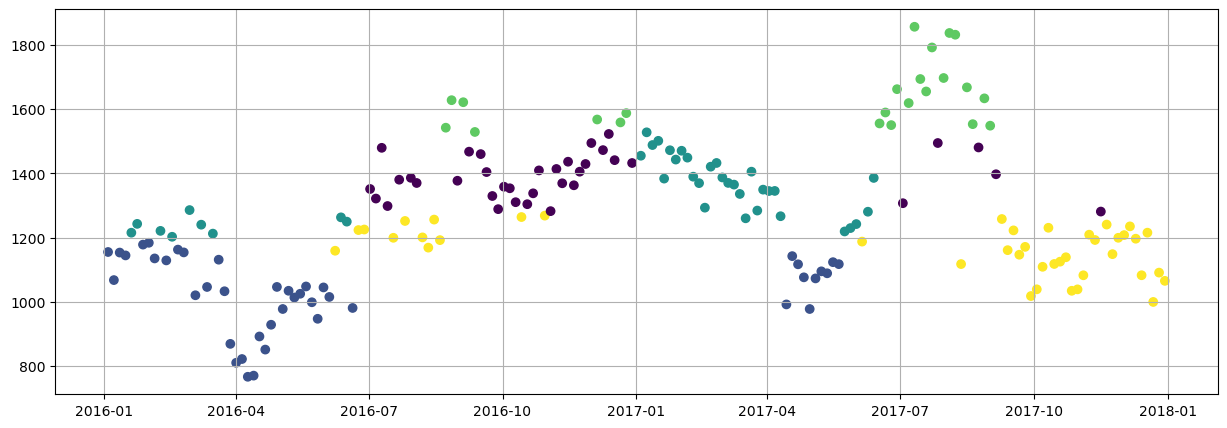

In [28]:
plt.scatter(test.index, test["pma"], c=prediction)

In [29]:
# TODO: change time repres using cos, sin transformation

In [129]:
ts_bydate.head()

,pma,tmp,year,month,dayofmonth,dayofyear,is_special_day,season,dayofweek,quarter
date,,,,,,,,,,
2016-01-01,1016.879030,10.632358,2016,1,1,1,0,1,4,1
2016-01-02,1132.572358,11.210259,2016,1,2,2,0,1,5,1
2016-01-03,1179.197928,11.308115,2016,1,3,3,0,1,6,1
2016-01-04,1157.773987,14.102192,2016,1,4,4,0,1,0,1
2016-01-05,1147.839757,14.428482,2016,1,5,5,0,1,1,1


In [40]:
def cyclical_transormation(df, columns: list, remove_original=False):
    df = df.copy()
    for col in columns:
        max_col_val = df[col].max()
        df[f"{col}_sin"] = np.sin((2*np.pi*df[col]) / max_col_val)
        df[f"{col}_cos"] = np.cos((2*np.pi*df[col]) / max_col_val)

    if remove_original:
        df = df.drop(columns=columns)

    return df

In [130]:
cyclical_columns = ["year", "month", "dayofmonth", "dayofyear", "season", "dayofweek", "quarter"]
df_cyclic = cyclical_transormation(ts_bydate, columns=cyclical_columns, remove_original=True)
df_cyclic.head()

,pma,tmp,is_special_day,year_sin,year_cos,month_sin,month_cos,dayofmonth_sin,dayofmonth_cos,dayofyear_sin,dayofyear_cos,season_sin,season_cos,dayofweek_sin,dayofweek_cos,quarter_sin,quarter_cos
date,,,,,,,,,,,,,,,,,
2016-01-01,1016.879030,10.632358,0,-0.003115,0.999995,0.5,0.866025,0.201299,0.979530,0.017166,0.999853,1.0,6.123234e-17,-8.660254e-01,-0.5,1.0,6.123234e-17
2016-01-02,1132.572358,11.210259,0,-0.003115,0.999995,0.5,0.866025,0.394356,0.918958,0.034328,0.999411,1.0,6.123234e-17,-8.660254e-01,0.5,1.0,6.123234e-17
2016-01-03,1179.197928,11.308115,0,-0.003115,0.999995,0.5,0.866025,0.571268,0.820763,0.051479,0.998674,1.0,6.123234e-17,-2.449294e-16,1.0,1.0,6.123234e-17
2016-01-04,1157.773987,14.102192,0,-0.003115,0.999995,0.5,0.866025,0.724793,0.688967,0.068615,0.997643,1.0,6.123234e-17,0.000000e+00,1.0,1.0,6.123234e-17
2016-01-05,1147.839757,14.428482,0,-0.003115,0.999995,0.5,0.866025,0.848644,0.528964,0.085731,0.996318,1.0,6.123234e-17,8.660254e-01,0.5,1.0,6.123234e-17


In [131]:
pca = PCA(n_components=0.95)
standard_scaler = StandardScaler()

train_transformed = pca.fit_transform(train)
train_transformed = standard_scaler.fit_transform(train_transformed)

train_transformed

array([[-8.91399987e-01],
       [-6.31059024e-01],
       [-4.66574287e-01],
       [-6.45218990e-01],
       [-4.44679812e-01],
       [-4.68822166e-01],
       [-7.34665209e-01],
       [-7.97224193e-01],
       [-7.74265045e-01],
       [-4.33419179e-01],
       [-7.15786039e-01],
       [-6.19030950e-01],
       [-5.11200115e-01],
       [-5.50645120e-01],
       [-1.91820206e-01],
       [-5.57674901e-01],
       [-6.81017324e-01],
       [-4.25108577e-01],
       [-3.92674356e-01],
       [-4.01036693e-01],
       [-4.24014118e-01],
       [-8.27929479e-01],
       [-6.89233503e-01],
       [-9.86524668e-02],
       [-3.63846771e-01],
       [-5.23581120e-01],
       [-2.53312507e-01],
       [-3.03700592e-01],
       [ 1.69628137e-01],
       [-3.20570170e-03],
       [-1.93499710e-01],
       [-2.73214526e-01],
       [-9.20504879e-01],
       [-6.96416245e-01],
       [-8.50367028e-01],
       [-7.01447955e-01],
       [-1.19698189e+00],
       [-1.19684599e+00],
       [-3.2

In [99]:
def train_test_split(df, day_threshold=4):
    train = df.loc[(df.reset_index().index + 1) % day_threshold != 0]
    test = df.loc[(df.reset_index().index + 1) % day_threshold == 0]

    return train, test

In [100]:
def pca_transform(df, explained_variance_threshold=0.95):
    pca = PCA(n_components=explained_variance_threshold)
    
    return pca.fit_transform(df)

def normalise(df):
    standard_scaler = StandardScaler()
    
    return standard_scaler.fit_transform(df)

In [132]:
train, test = train_test_split(df_cyclic)

In [133]:
reduced_train = normalise(pca_transform(train, explained_variance_threshold=0.9999))
reduced_train[:5]

array([[-1.17612819,  0.68177221],
       [-0.64689102,  0.76756044],
       [-0.433608  ,  0.8209527 ],
       [-0.57690122,  0.35096317],
       [-0.24392978,  1.06069847]])

In [134]:
def k_means_plot_silhouette_score(df, max_k=11):
    silhouette = []
    k_value = range(2, 11) # silhouette needs at least 2 clusters

    for k in k_value:
        kmeans = KMeans(n_clusters=k, n_init=10)
        kmeans.fit(df)
        cluster_labels = kmeans.labels_
        silhouette.append(silhouette_score(df, cluster_labels))

    plt.figure(figsize=[10, 6])
    plt.plot(k_value, silhouette, 'bx-')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Silhouette')
    plt.title('Silhouette Metric To Find Optimal Number Of Clusters')
    plt.show()

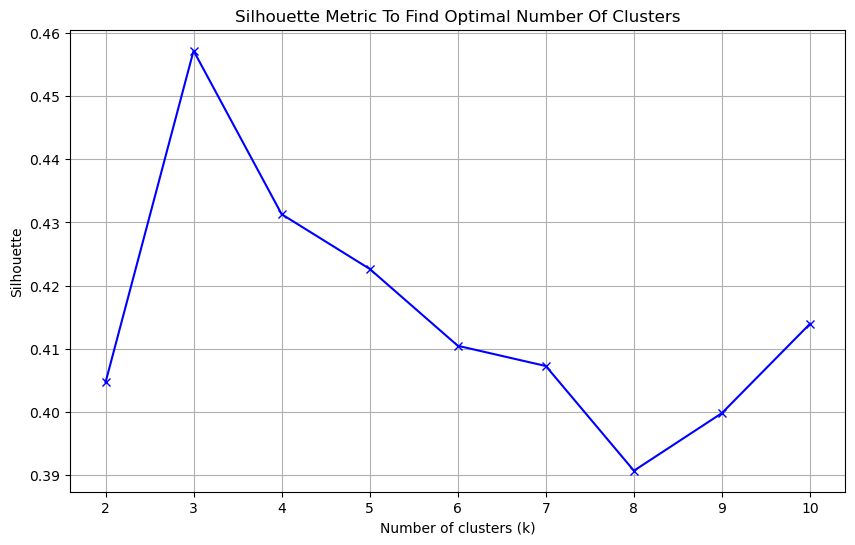

In [135]:
k_means_plot_silhouette_score(reduced_train)

In [116]:
def perform_kmeans_clustering(df, k):
    kmeans = KMeans(n_clusters=k, n_init=10)
    cluster = kmeans.fit(df)
    return cluster

In [136]:
cluster = perform_kmeans_clustering(reduced_train, k=3)

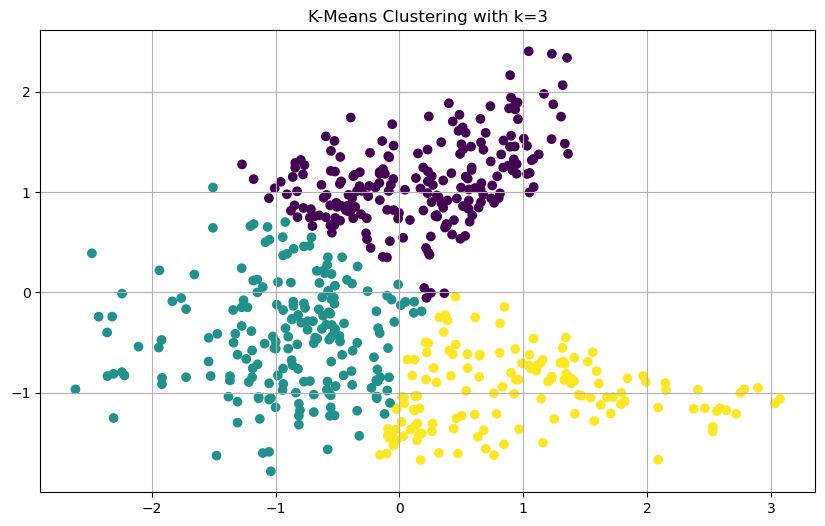

In [137]:
plt.figure(figsize=[10, 6])
plt.scatter(reduced_train[:, 0], reduced_train[:, 1], c=cluster.labels_)
plt.title(f'K-Means Clustering with k={3}')
plt.show()

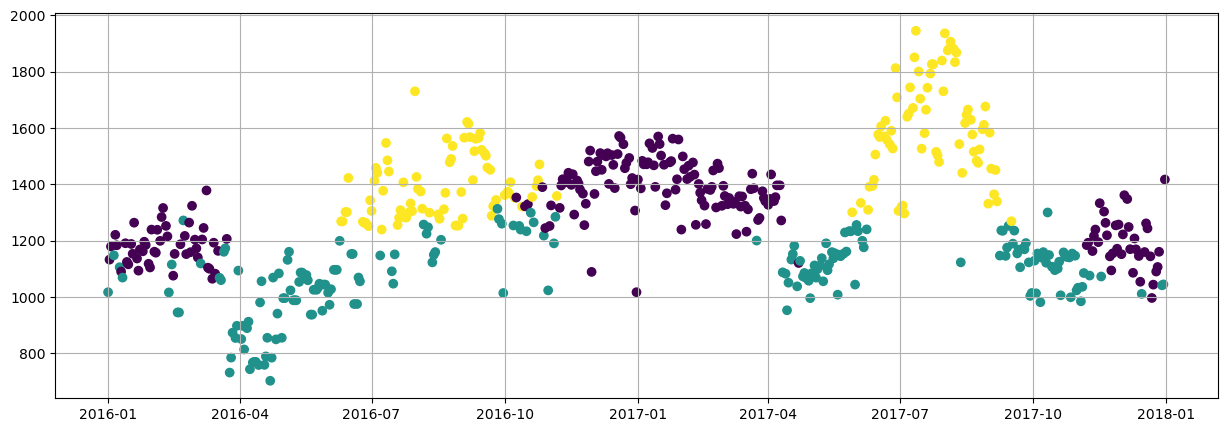

In [138]:
plt.scatter(train.index, train["pma"], c=cluster.labels_)


In [125]:
def preprocessing_pipeline(df):
    cyclic_df = cyclical_transormation(df, columns=cyclical_columns)
    reduced_normalized = normalise(pca_transform(cyclic_df, explained_variance_threshold=0.999))

    return reduced_normalized

In [ ]:
train, test = train_test_split()